In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Microsoft_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))

In [6]:
# Fitting the Random Forest regression model to the training set
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [7]:
# Getting the real stock price of 2023
dataset_test = pd.read_csv('Microsoft_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [9]:
# Special dataset structure for our test set
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [10]:
# Predicting the stock price of 2023 using the Random Forest model
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


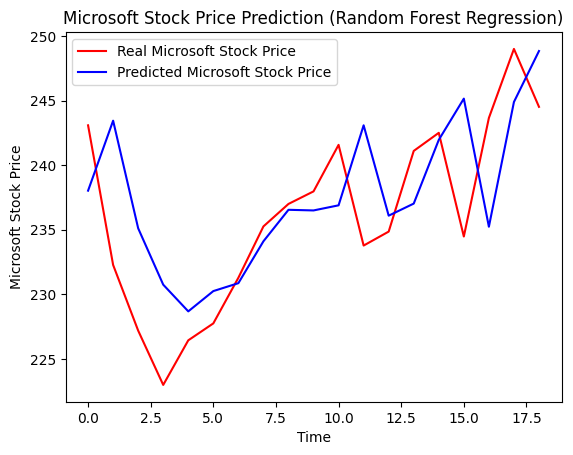

In [11]:
plt.plot(real_stock_price, color = 'red', label = 'Real Microsoft Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction (Random Forest Regression)')
plt.xlabel('Time')
plt.ylabel('Microsoft Stock Price')
plt.legend()
plt.savefig('figure.png', dpi=300)
plt.show()

## Evaluating the model
### Showing the closeness of predicted value and actual value

In [14]:
# RMSE
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('Root Mean Squared Error:', rmse)
# Calculate MAE
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('Mean Absoulte Error:', mae)

Root Mean Squared Error: 5.780287879944104
Mean Absoulte Error: 4.602579814736832


### Showing the variance in the Target variable

In [15]:
# R-squared to show how well the model fits the data
r2 = r2_score(real_stock_price, predicted_stock_price)
print("R2 score: ", r2)


R2 score:  0.29794226403860335


In [16]:
# Calculate MSE
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('Mean Squared Error:', mse)

Mean Squared Error: 33.4117279750287


In [17]:
# Calculate RMSE
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 5.780287879944104
